# Feature importances with forests of trees
ref: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

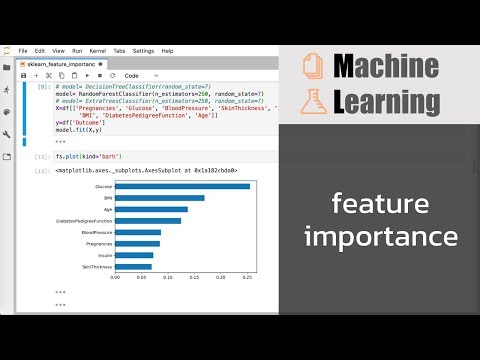

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Uojkhn-EXac', width=720, height=405)

In [168]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [169]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 1.3.4
numpy   version: 1.22.4
seaborn version: 0.11.2


## data dictionary
source: https://www.kaggle.com/uciml/pima-indians-diabetes-database  
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [170]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/diabetes.csv'
df=pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


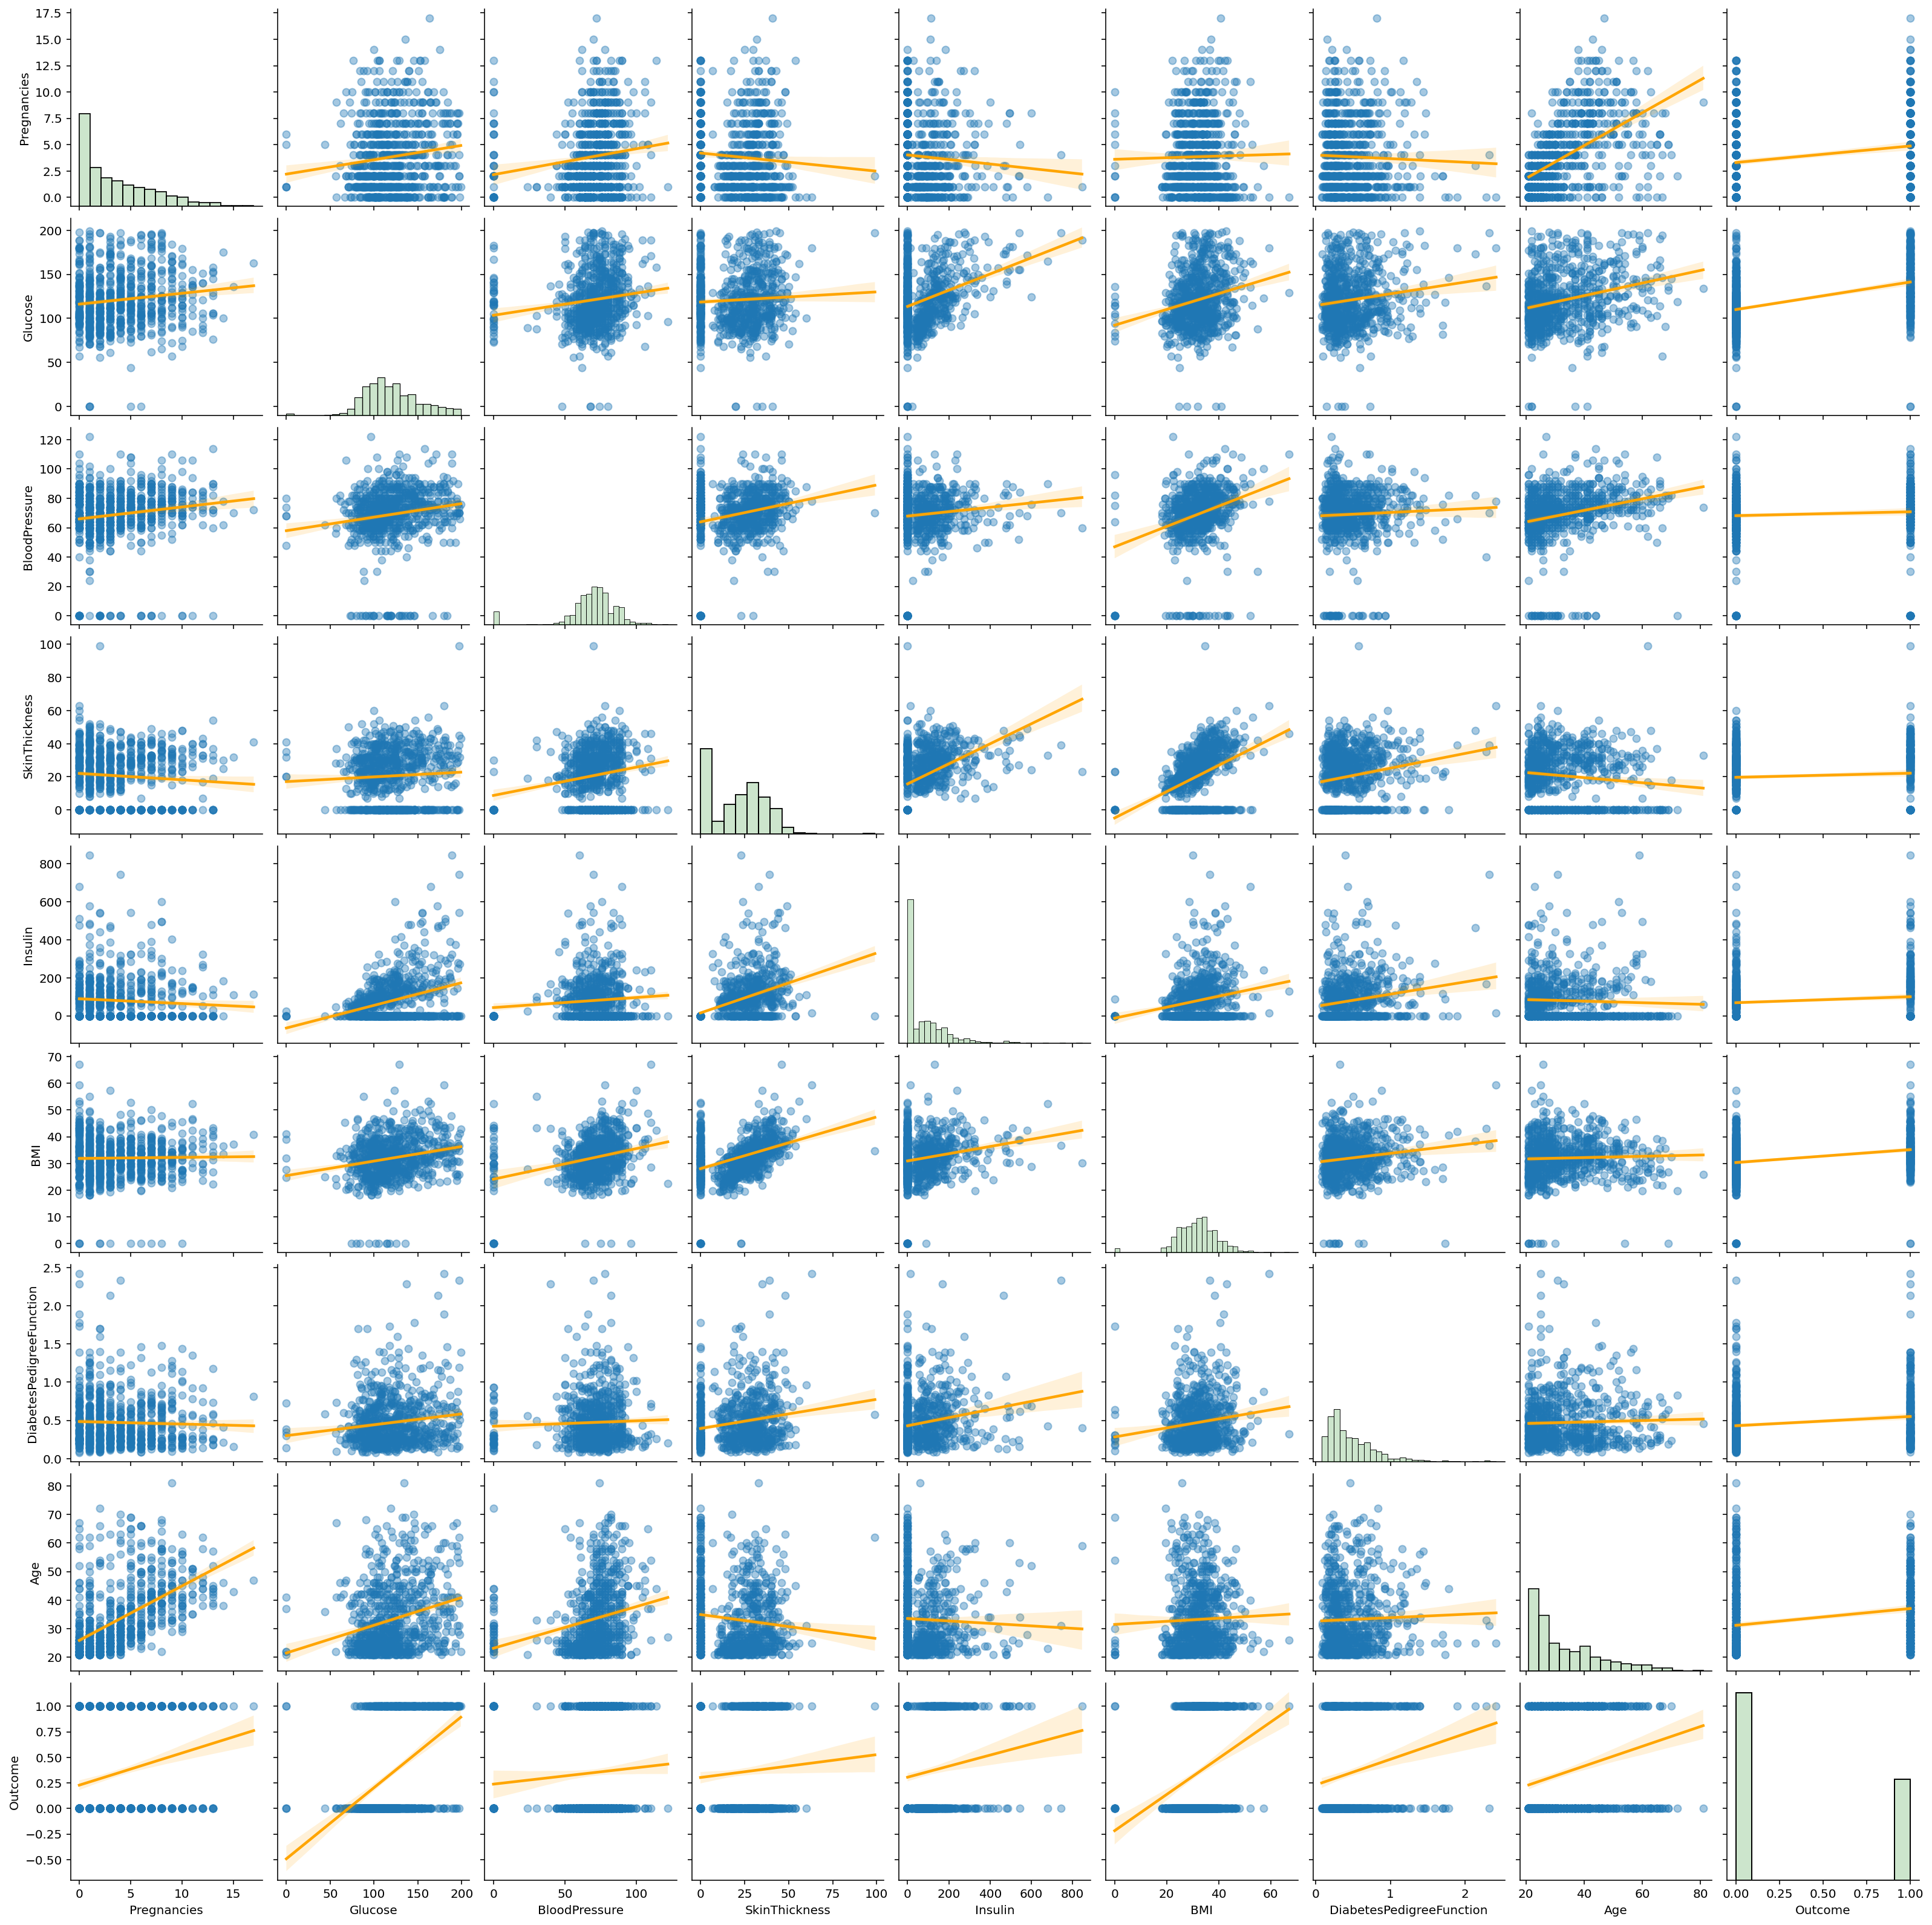

In [172]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

## sklearn: Classifier

In [173]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [174]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.1.2


In [175]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [176]:
# model= DecisionTreeClassifier(random_state=7)
model= RandomForestClassifier(n_estimators=250, random_state=7)
# model= ExtraTreesClassifier(n_estimators=250, random_state=7)
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']
model.fit(X,y)

RandomForestClassifier(n_estimators=250, random_state=7)

In [177]:
model.feature_importances_

array([0.084649  , 0.25538214, 0.08686371, 0.06915221, 0.07227062,
       0.16934724, 0.12464596, 0.13768912])

In [178]:
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

SkinThickness               0.069152
Insulin                     0.072271
Pregnancies                 0.084649
BloodPressure               0.086864
DiabetesPedigreeFunction    0.124646
Age                         0.137689
BMI                         0.169347
Glucose                     0.255382
dtype: float64

In [179]:
fs.sum()

1.0

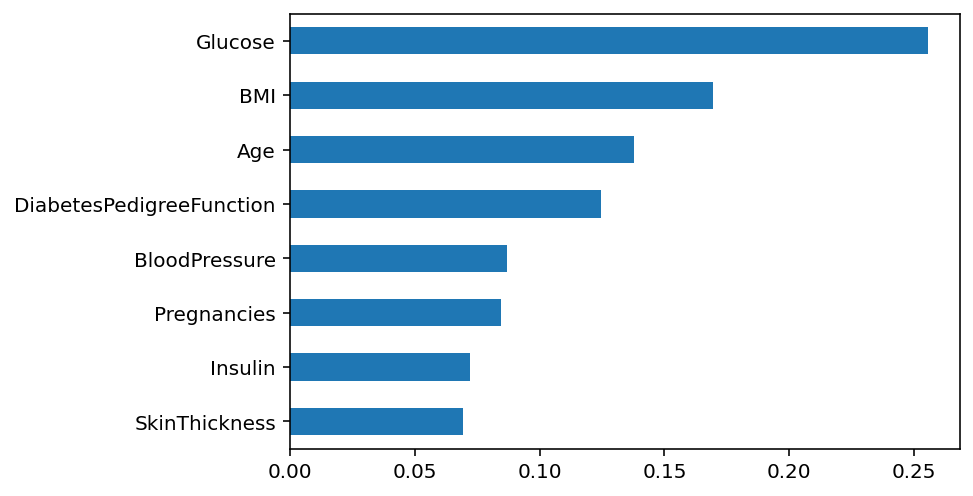

In [180]:
fs.plot(kind='barh');

In [181]:
fs[fs > .1]

DiabetesPedigreeFunction    0.124646
Age                         0.137689
BMI                         0.169347
Glucose                     0.255382
dtype: float64

In [182]:
fs.nlargest(4) #.index

Glucose                     0.255382
BMI                         0.169347
Age                         0.137689
DiabetesPedigreeFunction    0.124646
dtype: float64

In [183]:
fs[fs > .1].index

Index(['DiabetesPedigreeFunction', 'Age', 'BMI', 'Glucose'], dtype='object')

In [184]:
X=df[fs[fs > .1].index]
X.head()

,DiabetesPedigreeFunction,Age,BMI,Glucose
0,0.627,50,33.6,148
1,0.351,31,26.6,85
2,0.672,32,23.3,183
3,0.167,21,28.1,89
4,2.288,33,43.1,137


In [185]:
# X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
X=df[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']]
# X=df[fs[fs > .1].index]
y=df['Outcome']

In [186]:
# use stratify to split train/test = ต้องการให้ใน train and test มีสัดส่วนของ y (ซึ่งก็คือ Outcome) เท่ากัน 
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)

## scikit-learn: confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

<table>
<tr>
    <td></td>
    <td>predicted false</td>
    <td>predicted true</td>
</tr>
<tr>
    <td>actual false</td>
    <td>tn</td>
    <td>fp</td>
</tr>
<tr>
    <td>actual true</td>
    <td>fn</td>
    <td>tp</td>
</tr>
<table>

In [187]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'], 
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'], 
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    [SVC(kernel='linear'), 'SVC_linear'], 
    [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score,a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')    

KNeighborsClassifier score: 0.7403
[[125  25]
 [ 35  46]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       150
           1       0.65      0.57      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.73      0.74      0.74       231

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.7879
[[137  13]
 [ 36  45]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       150
           1       0.78      0.56      0.65        81

    accuracy                           0.79       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.79      0.79      0.78       231

----------------------------------------------------------------------------------------------------
Perceptron           score: 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier        score: 0.7273
[[134  16]
 [ 47  34]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       150
           1       0.68      0.42      0.52        81

    accuracy                           0.73       231
   macro avg       0.71      0.66      0.66       231
weighted avg       0.72      0.73      0.71       231

----------------------------------------------------------------------------------------------------
SVC_linear           score: 0.7792
[[136  14]
 [ 37  44]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       150
           1       0.76      0.54      0.63        81

    accuracy                           0.78       231
   macro avg       0.77      0.72      0.74       231
weighted avg       0.78      0.78      0.77       231

----------------------------------------------------------------------------------------------------
GaussianProcessClassifier sc

In [188]:
model_scores

[[0.7402597402597403, 'KNeighborsClassifier'],
 [0.7878787878787878, 'LogisticRegression'],
 [0.5584415584415584, 'Perceptron'],
 [0.7186147186147186, 'DecisionTreeClassifier'],
 [0.7532467532467533, 'GradientBoostingClassifier'],
 [0.7359307359307359, 'RandomForestClassifier'],
 [0.7229437229437229, 'BaggingClassifier'],
 [0.7359307359307359, 'AdaBoostClassifier'],
 [0.7835497835497836, 'GaussianNB'],
 [0.7272727272727273, 'MLPClassifier'],
 [0.7792207792207793, 'SVC_linear'],
 [0.6883116883116883, 'GaussianProcessClassifier']]

In [189]:
dscore=pd.DataFrame(model_scores, columns=['score', 'classifier'])
dscore.sort_values('score', ascending=False)

,score,classifier
1,0.787879,LogisticRegression
8,0.783550,GaussianNB
10,0.779221,SVC_linear
4,0.753247,GradientBoostingClassifier
0,0.740260,KNeighborsClassifier
5,0.735931,RandomForestClassifier
7,0.735931,AdaBoostClassifier
9,0.727273,MLPClassifier
6,0.722944,BaggingClassifier
3,0.718615,DecisionTreeClassifier
